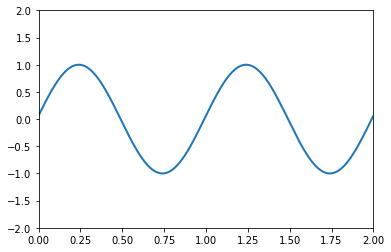

In [2]:
"""
A simple example of an animated plot
"""
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
# create our line object which will be modified in the animation
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
# we simply plot an empty line: we’ll add data to the line later
line, = ax.plot([], [], lw=2) 


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

    
# animation function.  This is called sequentially
# It takes a single parameter, the frame number i 
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))  # update the data
    line.set_data(x, y)
    return line,

# Makes an animation by repeatedly calling a function func
# frames can be a generator, an iterable, or a number of frames.
# interval draws a new frame every interval milliseconds.
# blit=True means only re-draw the parts that have changed.
# 在这里设置一个200帧的动画，每帧之间间隔20毫秒
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
                               

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()  # plt.show() 会一直循环播放动画